In [1]:
using Clapeyron, PyCall, CSV, Tables, IJulia, DelimitedFiles, Plots
import PyPlot; const plt = PyPlot
ternary = pyimport("ternary")

PyObject <module 'ternary' from '/home/darshan/anaconda3/envs/FEOS/lib/python3.10/site-packages/ternary/__init__.py'>

In [2]:
model1 = GERG2008(["methane"])
model2 = PCSAFT(["methane"])
model3 = EOS_CG(["methane"])
model4 = PR(["methane"])
model5 = SAFTVRMie(["methane"])

models = [model1, model2, model3, model4, model5]

for model in models
    println("Model: ", model)
    Tc, pc, vc = crit_pure(model1)
    println("Critical temperature computed using model $(model): $(Tc) K")
end


Model: MultiFluid{EmpiricAncillary, AsymmetricMixing, EmpiricDeparture}("methane")
Critical temperature computed using model MultiFluid{EmpiricAncillary, AsymmetricMixing, EmpiricDeparture}("methane"): 190.564 K
Model: PCSAFT{BasicIdeal, Float64}("methane")
Critical temperature computed using model PCSAFT{BasicIdeal, Float64}("methane"): 190.564 K
Model: MultiFluid{EmpiricAncillary, AsymmetricMixing, EmpiricDeparture}("methane")
Critical temperature computed using model MultiFluid{EmpiricAncillary, AsymmetricMixing, EmpiricDeparture}("methane"): 190.564 K
Model: PR{BasicIdeal, PRAlpha, NoTranslation, vdW1fRule}("methane")
Critical temperature computed using model PR{BasicIdeal, PRAlpha, NoTranslation, vdW1fRule}("methane"): 190.564 K
Model: SAFTVRMie{BasicIdeal, Float64}("methane")
Critical temperature computed using model SAFTVRMie{BasicIdeal, Float64}("methane"): 190.564 K


In [3]:
temp            = collect(190.564:-1:150)

spin_gerg_2008  = NamedTuple{(:T, :p), Tuple{Float64, Float64}}[]
spin_eos_cg     = NamedTuple{(:T, :p), Tuple{Float64, Float64}}[]
spin_pcsaft     = NamedTuple{(:T, :p), Tuple{Float64, Float64}}[]
spin_pr         = NamedTuple{(:T, :p), Tuple{Float64, Float64}}[]
spin_saftvrmie  = NamedTuple{(:T, :p), Tuple{Float64, Float64}}[]

for T in temp
    p_spin, v_spin = spinodal_pressure(model1, T, [1.0]; phase = :l)
    push!(spin_gerg_2008, (T=T, p=p_spin))
end

for T in temp
    p_spin, v_spin = spinodal_pressure(model3, T, [1.0]; phase = :l)
    push!(spin_eos_cg, (T=T, p=p_spin))
end

for T in temp
    p_spin, v_spin = spinodal_pressure(model2, T, [1.0]; phase = :l)
    push!(spin_pcsaft, (T=T, p=p_spin))
end

for T in temp
    p_spin, v_spin = spinodal_pressure(model4, T, [1.0]; phase = :l)
    push!(spin_pr, (T=T, p=p_spin))
end

for T in temp
    p_spin, v_spin = spinodal_pressure(model5, T, [1.0]; phase = :l)
    push!(spin_saftvrmie, (T=T, p=p_spin))
end

In [4]:
temp            = collect(190.564:-1:150)
sat_gerg_2008  = NamedTuple{(:T, :p), Tuple{Float64, Float64}}[]

for T in temp
    p_sat = saturation_pressure(model1, T, [1.0])
    # print(p_sat[1])
    push!(sat_gerg_2008, (T=T, p=p_sat[1]))
end

In [5]:
data_gerg       = hcat([s.T for s in spin_gerg_2008], [s.p for s in spin_gerg_2008])
data_cg         = hcat([s.T for s in spin_eos_cg], [s.p for s in spin_eos_cg])
data_pcsaft     = hcat([s.T for s in spin_pcsaft], [s.p for s in spin_pcsaft])
data_pr         = hcat([s.T for s in spin_pr], [s.p for s in spin_pr])
data_sat_gerg   = hcat([s.T for s in sat_gerg_2008], [s.p for s in sat_gerg_2008])
data_saftvrmie  = hcat([s.T for s in spin_saftvrmie], [s.p for s in spin_saftvrmie])

writedlm("spin_gerg_2008.dat", data_gerg, ' ')
writedlm("spin_eos_cg.dat", data_cg, ' ')
writedlm("spin_pcsaft.dat", data_pcsaft, ' ')
writedlm("spin_pr.dat", data_pr, ' ')
writedlm("sat_gerg_2008.dat", data_sat_gerg, ' ')
writedlm("spin_saftvrmie.dat", data_saftvrmie, ' ')

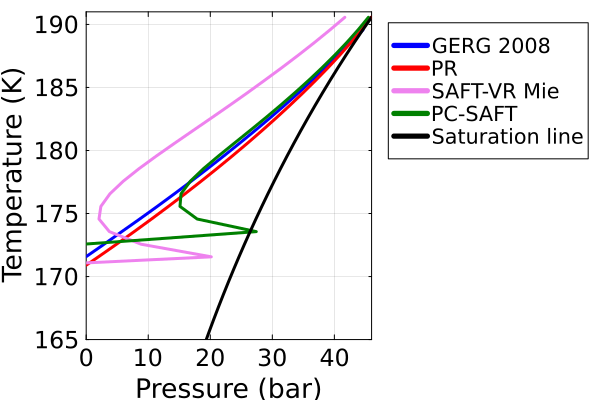

In [6]:
# Create the plot
plot(
    data_gerg[:, 2] ./ 1e5, data_gerg[:, 1],
    label="GERG 2008", lw=3, color=:blue, tickfont=font(16), guidefont=font(18), legendfontsize=14, framestyle=:box
)
# plot!(
#     data_cg[:, 2] ./ 1e5, data_cg[:, 1],
#     label="EOS CG", lw=3, color=:red
# )
plot!(
    data_pr[:, 2] ./ 1e5, data_pr[:, 1],
    label="PR", lw=3, color=:red)
plot!(
    data_saftvrmie[:, 2] ./ 1e5, data_saftvrmie[:, 1],
    label="SAFT-VR Mie", lw=3, color=:violet
)
plot!(
    data_pcsaft[:, 2] ./ 1e5, data_pcsaft[:, 1],
    label="PC-SAFT", lw=3, color=:green
)
plot!(
    data_sat_gerg[:, 2] ./1e5, data_sat_gerg[:,1],
    label="Saturation line", lw=3, color=:black
)
ylabel!("Temperature (K)", fontsize=18)
xlabel!("Pressure (bar)", fontsize=18)
# title!("Spinodal Pressure vs Temperature", fontsize=20)
plot!(legend=:outertopright)
# plot!(xlims=(data_gerg[end,1] - 273.15, data_gerg[1,1] - 273.15), ylims=(0, 100))
xlims!(0, 46)
ylims!(165, 191)
# savefig("spinodal_CO2_PR.png")